# Laboratorio 1 - Aprendizaje de Máquina
### Daniel Crovo
### Santiago Salazar

In [2]:
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Cargar 
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

# Clase para convertir matrices dispersas a matrices densas (
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())




## Modelo Bayes ingenuo

In [3]:
#  Gaussian Naive Bayes
model_gnb = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('to_dense', DenseTransformer()), 
    ('clf', GaussianNB())
])
model_gnb.fit(train.data, train.target)
labels_gnb = model_gnb.predict(test.data)
print("Gaussian Naive Bayes:")
print(classification_report(test.target, labels_gnb))


Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       389
           1       0.84      0.88      0.86       394
           2       0.84      0.89      0.87       398
           3       0.85      0.78      0.81       251

    accuracy                           0.85      1432
   macro avg       0.85      0.85      0.85      1432
weighted avg       0.85      0.85      0.85      1432



## Modelo Gausioano multinomial

In [4]:

#  Multinomial Naive Bayes
model_mnb = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_mnb.fit(train.data, train.target)
labels_mnb = model_mnb.predict(test.data)
print("\nMultinomial Naive Bayes:")
print(classification_report(test.target, labels_mnb))




Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



## Regresión Logística

In [5]:

#  Regresión Logística
model_lr = make_pipeline(TfidfVectorizer(), LogisticRegression())
model_lr.fit(train.data, train.target)
labels_lr = model_lr.predict(test.data)
print("\nLogistic Regression:")
print(classification_report(test.target, labels_lr))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       389
           1       0.94      0.94      0.94       394
           2       0.85      0.95      0.90       398
           3       0.94      0.61      0.74       251

    accuracy                           0.89      1432
   macro avg       0.90      0.87      0.87      1432
weighted avg       0.90      0.89      0.89      1432



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

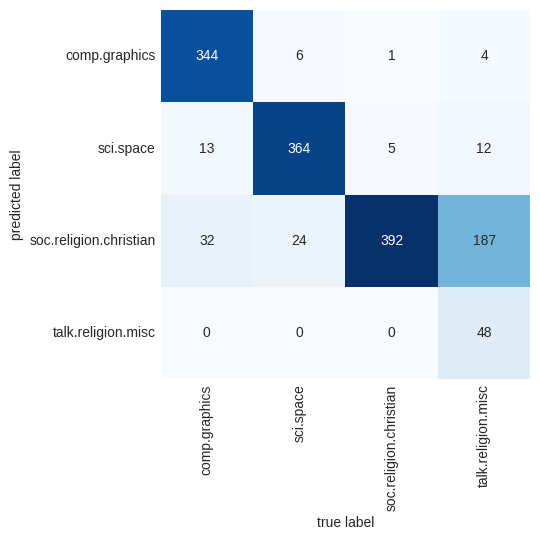

In [8]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');